In [33]:
import altair as alt
import pandas as pd
import pandas_profiling
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Helper Functions

In [8]:
from datetime import datetime
import time
import math

def combineDateTime(Date,Time):
    
    try:
        month,day,year = str(Date).split('/')
        if year == '1015':
            year = '2015'
            Date = month+'/'+day+'/'+year
        
        datetime(int(year),int(month),int(day)) #this checks if it's a proper date format
        
        myDateTime = str(Date)+' '+str(Time)
        datetime.strptime(myDateTime, "%m/%d/%Y %H:%M:%S")
    except:
        myDateTime = None
        
    return myDateTime

def getHours(fromDateTime, toDateTime):
    dateDiff = None
    
    try:
        if (fromDateTime !=None) & (toDateTime != None):
            start = datetime.strptime(fromDateTime, "%m/%d/%Y %H:%M:%S")
            end = datetime.strptime(toDateTime, "%m/%d/%Y %H:%M:%S")
            dateDiff = end - start
            dateDiff = dateDiff.seconds
            dateDiff = math.ceil(dateDiff/60/60)
    except:
        dateDiff = None
    
    return dateDiff

def getSeason(Date):
    season = None
    try:
        #strip month out
        month,day,year = str(Date).split('/')
        #define seasons by month
        Winter = [12,1,2]
        Spring = [3,4,5]
        Summer = [6,7,8]
        Fall = [9,10,11]
        
        if Winter.count(int(month)) == 1:
            season = 'Winter'
        elif Spring.count(int(month)) == 1:
            season = 'Spring'
        elif Summer.count(int(month)) == 1:
            season = 'Summer'
        elif Fall.count(int(month)) == 1:
            season = 'Fall'
    except:
        season = None
    
    return season

def getDayTime(Time):
    daytime = None
    
    try:
        hour,minute,second = str(Time).split(':')
        val = int(str(hour)+str(minute)) #convert into a number
        
        #evaluate the resulting value to determine day time
        if (val>200)&(val<=600):
            daytime = 'Early Morning'
        elif (val>600)&(val<=1000):
            daytime = 'Morning'
        elif (val>1000)&(val<=1400):
            daytime = 'Day'
        elif (val>1400)&(val<=1800):
            daytime = 'Evening'
        elif (val>1800)&(val<=2200):
            daytime = 'Night'
        elif (val>2200)&(val<=2400):
            daytime = 'Late Night'
        elif (val>=100)&(val<=200):
            daytime = 'Late Night'
    except:
        daytime = None
    
    return daytime

def getMonth(Date):
    val = None
    try:
        #strip month out
        month,day,year = str(Date).split('/')
        #mo = month
        dto = datetime.strptime(month,"%m")
        val = dto.strftime("%B") #date(1900, mo, 1).strftime('%B')

    except:
        val = None
    
    return val

def getDay(Date):
    val = None
    try:
        #strip day out
        month,day,year = str(Date).split('/')

        val = int(day)

    except:
        val = None
    
    return val

def getYear(Date):
    val = None
    try:
        #strip year out
        month,day,year = str(Date).split('/')
        if year == '1015':
            year = '2015'
   
        val = int(year)

    except:
        val = None
    
    return val
    

In [10]:
archive = zipfile.ZipFile('C:\\Users\\dlarsen.AD\\Desktop\\School\\Semester4\\ML1\\gitstuffML1\\NewYorkCityCrimes2015\\Data\\NYPD_Complaint_Data_Historic.zip', 'r')
df_Crime = pd.read_csv(archive.read('NYPD_Complaint_Data_Historic.csv'))
df_Crime.head()

OSError: Expected file path name or file-like object, got <class 'bytes'> type

In [13]:
#load csv
file_path = "C:\\Users\\dlarsen.AD\\Desktop\\School\\Semester4\\ML1\\gitstuffML1\\NYPD_Complaint_Data_Historic\\NYPD_Complaint_Data_Historic.csv"
#load Data into Pandas
df_Crime = pd.read_csv(file_path)

C:\Users\dlarsen.AD\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_Crime.head(25)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"
5,365661343,12/31/2015,23:18:00,12/31/2015,23:25:00,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,FELONY,N.Y. POLICE DEPT,BROOKLYN,71.0,FRONT OF,DRUG STORE,NaN,NaN,996149.0,181562.0,40.665023,-73.957111,"(40.665022689, -73.957110763)"
6,608231454,12/31/2015,23:15:00,NaN,NaN,12/31/2015,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,7.0,OPPOSITE OF,STREET,NaN,NaN,987373.0,201662.0,40.720200,-73.988735,"(40.720199996, -73.988735082)"
7,265023856,12/31/2015,23:15:00,12/31/2015,23:15:00,12/31/2015,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,46.0,FRONT OF,STREET,NaN,NaN,1009041.0,247401.0,40.845707,-73.910398,"(40.845707148, -73.910398033)"
8,989238731,12/31/2015,23:15:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,48.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1014154.0,251416.0,40.856711,-73.891900,"(40.856711291, -73.891899956)"
9,415095955,12/31/2015,23:10:00,12/31/2015,23:10:00,12/31/2015,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,19.0,INSIDE,DRUG STORE,NaN,NaN,994327.0,218211.0,40.765618,-73.963623,"(40.765617688, -73.96362342)"


# Calculate Start and End timestamps and Duration of Crime

In [15]:
df_Crime['Start_Dt_Tm'] = df_Crime.apply(lambda x: combineDateTime(x['CMPLNT_FR_DT'],x['CMPLNT_FR_TM']),axis=1)

In [16]:
df_Crime['End_Dt_Tm'] = df_Crime.apply(lambda x: combineDateTime(x['CMPLNT_TO_DT'],x['CMPLNT_TO_TM']),axis=1)

In [17]:
df_Crime['Duration'] = df_Crime.apply(lambda x: getHours(x['Start_Dt_Tm'],x['End_Dt_Tm']),axis=1)

In [18]:
df_Crime['Month'] = df_Crime.apply(lambda x: getMonth(x['CMPLNT_FR_DT']),axis=1)

In [19]:
df_Crime['Day'] = df_Crime.apply(lambda x: getDay(x['CMPLNT_FR_DT']),axis=1)

In [20]:
df_Crime['Year'] = df_Crime.apply(lambda x: getYear(x['CMPLNT_FR_DT']),axis=1)

# cut duration into 3 bins (short, medium, long)

In [21]:
df_Crime['Duration_lbl'] = pd.cut(x=df_Crime['Duration'], bins=[1,8,16,26], labels=['Short', 'Medium', 'Long'], right=False)

# cut start time into season and daytime

In [22]:
df_Crime['Season'] = df_Crime.apply(lambda x: getSeason(x['CMPLNT_FR_DT']),axis=1)

In [23]:
df_Crime['Daytime'] = df_Crime.apply(lambda x: getDayTime(x['CMPLNT_FR_TM']),axis=1)

# convert datatypes

In [24]:
df_Crime['Start_Dt_Tm'] = pd.to_datetime(df_Crime['Start_Dt_Tm'])

In [25]:
df_Crime['End_Dt_Tm'] = pd.to_datetime(df_Crime['End_Dt_Tm'])

In [230]:
df_Crime.dtypes

CMPLNT_NUM                    int64
CMPLNT_FR_DT                 object
CMPLNT_FR_TM                 object
CMPLNT_TO_DT                 object
CMPLNT_TO_TM                 object
RPT_DT                       object
KY_CD                         int64
OFNS_DESC                    object
PD_CD                       float64
PD_DESC                      object
CRM_ATPT_CPTD_CD             object
LAW_CAT_CD                   object
JURIS_DESC                   object
BORO_NM                      object
ADDR_PCT_CD                 float64
LOC_OF_OCCUR_DESC            object
PREM_TYP_DESC                object
PARKS_NM                     object
HADEVELOPT                   object
X_COORD_CD                  float64
Y_COORD_CD                  float64
Latitude                    float64
Longitude                   float64
Lat_Lon                      object
Start_Dt_Tm          datetime64[ns]
End_Dt_Tm            datetime64[ns]
Duration                    float64
Duration_lbl               c

# Dataframe Details

In [80]:
df_Crime.shape

(1048575, 27)

In [231]:
print (df_Crime['Start_Dt_Tm'].min())
print (df_Crime['Start_Dt_Tm'].max())

1910-09-20 00:01:00
2015-12-31 23:45:00


# Analyze Season Data

In [236]:
df_day = df_Crime.groupby(['Day']).agg(count_cmplnt=('CMPLNT_NUM','count')).reset_index()
df_day

,Day,count_cmplnt
0,1.0,43583
1,2.0,33698
2,3.0,33289
3,4.0,34181
4,5.0,34423
5,6.0,34081
6,7.0,34180
7,8.0,33854
8,9.0,33938
9,10.0,34981


In [234]:
df_mo = df_Crime.groupby(['Month']).agg(count_cmplnt=('CMPLNT_NUM','count')).reset_index()
df_mo

,Month,count_cmplnt
0,April,79373
1,August,90052
2,December,110305
3,February,65837
4,January,74778
5,July,89611
6,June,84739
7,March,78740
8,May,87352
9,November,114936


In [237]:
mySort = ["January","February","March","April","May","June","July","August","September","October","November","December"]

alt.Chart(df_mo).mark_bar().encode(
  x = alt.Y('Month:N', sort=mySort),
  y='count_cmplnt:Q',
  tooltip = ['Month', 'count_cmplnt']
).properties(width = 400, height = 300, title="Crimes by Month")

alt.Chart(...)

In [238]:
df_season = df_Crime.groupby(['Season']).agg(count_cmplnt=('CMPLNT_NUM','count')).reset_index()
df_season

,Season,count_cmplnt
0,Fall,287723
1,Spring,245465
2,Summer,264402
3,Winter,250920
4,nan,65


In [241]:
mySort = ["Spring","Summer","Fall","Winter"]

alt.Chart(df_season).mark_bar().encode(
  x = alt.Y('Season:N', sort=mySort),
  y='count_cmplnt:Q',
  tooltip = ['Season', 'count_cmplnt']
).properties(width = 400, height = 300, title="Crimes by Season")

alt.Chart(...)

In [233]:
df_season_ofns = df_Crime.groupby(['Season','OFNS_DESC']).agg(count_cmplnt=('CMPLNT_NUM','count')).reset_index()
df_season_ofns

,Season,OFNS_DESC,count_cmplnt
0,Fall,ADMINISTRATIVE CODE,639
1,Fall,ADMINISTRATIVE CODES,1
2,Fall,AGRICULTURE & MRKTS LAW-UNCLASSIFIED,23
3,Fall,ALCOHOLIC BEVERAGE CONTROL LAW,35
4,Fall,ANTICIPATORY OFFENSES,2
5,Fall,ARSON,685
6,Fall,ASSAULT 3 & RELATED OFFENSES,30438
7,Fall,BURGLAR'S TOOLS,228
8,Fall,BURGLARY,9955
9,Fall,CHILD ABANDONMENT/NON SUPPORT,12


In [245]:
alt.Chart(df_season_ofns[df_season_ofns.Season == 'Spring']).mark_bar().encode(
  x = alt.Y('OFNS_DESC:N', sort='-y'),
  y='count_cmplnt:Q',
  tooltip = ['OFNS_DESC', 'count_cmplnt']
).properties(width = 800, height = 300, title="Crimes volumes in Spring by Offense Description")

alt.Chart(...)

In [246]:
alt.Chart(df_season_ofns[df_season_ofns.Season == 'Summer']).mark_bar().encode(
  x = alt.Y('OFNS_DESC:N', sort='-y'),
  y='count_cmplnt:Q',
  tooltip = ['OFNS_DESC', 'count_cmplnt']
).properties(width = 800, height = 300, title="Crimes volumes in Summer by Offense Description")

alt.Chart(...)

In [247]:
alt.Chart(df_season_ofns[df_season_ofns.Season == 'Fall']).mark_bar().encode(
  x = alt.Y('OFNS_DESC:N', sort='-y'),
  y='count_cmplnt:Q',
  tooltip = ['OFNS_DESC', 'count_cmplnt']
).properties(width = 800, height = 300, title="Crimes volumes in Fall by Offense Description")

alt.Chart(...)

In [248]:
alt.Chart(df_season_ofns[df_season_ofns.Season == 'Winter']).mark_bar().encode(
  x = alt.Y('OFNS_DESC:N', sort='-y'),
  y='count_cmplnt:Q',
  tooltip = ['OFNS_DESC', 'count_cmplnt']
).properties(width = 800, height = 300, title="Crimes volumes in Winter by Offense Description")

alt.Chart(...)

In [158]:
df_daytime = df_Crime.groupby(['Daytime']).agg(count_cmplnt=('CMPLNT_NUM','count')).reset_index()
df_daytime

,Daytime,count_cmplnt
0,Day,191222
1,Early Morning,88855
2,Evening,243485
3,Late Night,123356
4,Morning,122594
5,Night,229188


In [249]:
df_daytime_ofns = df_Crime.groupby(['Daytime','OFNS_DESC']).agg(count_cmplnt=('CMPLNT_NUM','count')).reset_index()
df_daytime_ofns

,Daytime,OFNS_DESC,count_cmplnt
0,Day,ADMINISTRATIVE CODE,471
1,Day,AGRICULTURE & MRKTS LAW-UNCLASSIFIED,16
2,Day,ALCOHOLIC BEVERAGE CONTROL LAW,4
3,Day,ANTICIPATORY OFFENSES,3
4,Day,ARSON,300
5,Day,ASSAULT 3 & RELATED OFFENSES,16365
6,Day,BURGLAR'S TOOLS,154
7,Day,BURGLARY,7221
8,Day,CHILD ABANDONMENT/NON SUPPORT,6
9,Day,CRIMINAL MISCHIEF & RELATED OF,14901


In [251]:
mySort = ["Early Morning","Morning","Day","Evening","Night","Late Night"]
alt.Chart(df_daytime_ofns).mark_bar().encode(
  x = alt.Y('Daytime:N', sort=mySort),
  y = 'count_cmplnt:Q',
  color='OFNS_DESC:N',
  tooltip = ['Daytime', 'count_cmplnt', 'OFNS_DESC']
).properties(width = 300, height = 400, title="Relationship between Daytime and Crime Volume")

alt.Chart(...)

In [84]:
df_boro_law = df_Crime.groupby(['BORO_NM','LAW_CAT_CD']).agg({'CMPLNT_NUM':'count'}).reset_index()
df_boro_law

,BORO_NM,LAW_CAT_CD,CMPLNT_NUM
0,BRONX,FELONY,63284
1,BRONX,MISDEMEANOR,135894
2,BRONX,VIOLATION,28299
3,BROOKLYN,FELONY,105539
4,BROOKLYN,MISDEMEANOR,167423
5,BROOKLYN,VIOLATION,42686
6,MANHATTAN,FELONY,76455
7,MANHATTAN,MISDEMEANOR,141374
8,MANHATTAN,VIOLATION,26920
9,QUEENS,FELONY,71276


In [86]:
import altair as alt

alt.Chart(df_boro_law).mark_bar().encode(
  x=alt.Y('BORO_NM:N', sort='-y'),
  y='CMPLNT_NUM:Q',
  color='LAW_CAT_CD',
  tooltip = ['BORO_NM', 'CMPLNT_NUM', 'LAW_CAT_CD']
).properties(width = 500, height = 400, title="Proportion of Crime Categories by Borough")

alt.Chart(...)

In [87]:
df_boro_ofns = df_Crime.groupby(['BORO_NM','OFNS_DESC']).agg({'CMPLNT_NUM':'count'}).reset_index()
df_boro_ofns

,BORO_NM,OFNS_DESC,CMPLNT_NUM
0,BRONX,ADMINISTRATIVE CODE,461
1,BRONX,AGRICULTURE & MRKTS LAW-UNCLASSIFIED,29
2,BRONX,ALCOHOLIC BEVERAGE CONTROL LAW,80
3,BRONX,ANTICIPATORY OFFENSES,2
4,BRONX,ARSON,760
5,BRONX,ASSAULT 3 & RELATED OFFENSES,28964
6,BRONX,BURGLAR'S TOOLS,77
7,BRONX,BURGLARY,6088
8,BRONX,CHILD ABANDONMENT/NON SUPPORT,20
9,BRONX,CRIMINAL MISCHIEF & RELATED OF,21650


In [88]:
alt.Chart(df_boro_ofns).mark_bar().encode(
  x=alt.Y('BORO_NM:N', sort='-y'),
  y='CMPLNT_NUM:Q',
  color='OFNS_DESC',
  tooltip = ['BORO_NM', 'CMPLNT_NUM', 'OFNS_DESC']
).properties(width = 500, height = 400, title="Proportion of Offensive Description by Borough")

alt.Chart(...)

In [108]:
df_boro_dur_ofns = df_Crime.groupby(['Duration','OFNS_DESC']).agg(count_cmplnt=('CMPLNT_NUM','count')).reset_index()
df_boro_dur_ofns

,Duration,OFNS_DESC,count_cmplnt
0,0.0,ADMINISTRATIVE CODE,87
1,0.0,AGRICULTURE & MRKTS LAW-UNCLASSIFIED,9
2,0.0,ALCOHOLIC BEVERAGE CONTROL LAW,4
3,0.0,ANTICIPATORY OFFENSES,1
4,0.0,ARSON,188
5,0.0,ASSAULT 3 & RELATED OFFENSES,3758
6,0.0,BURGLAR'S TOOLS,27
7,0.0,BURGLARY,640
8,0.0,CRIMINAL MISCHIEF & RELATED OF,5188
9,0.0,CRIMINAL TRESPASS,522


In [112]:
alt.Chart(df_boro_dur_ofns).mark_bar().encode(
  x = alt.Y('Duration:Q', sort='-x'),
  y = 'count_cmplnt:Q',
  color='OFNS_DESC:N',
  tooltip = ['Duration', 'count_cmplnt', 'OFNS_DESC']
).properties(width = 700, height = 400, title="Relationship between Duration and Offensive Description")

alt.Chart(...)

In [109]:
alt.Chart(df_boro_dur_ofns[(df_boro_dur_ofns.Duration > 1)&(df_boro_dur_ofns.OFNS_DESC != 'PETIT LARCENY')]).mark_bar().encode(
  x = alt.Y('Duration:Q', sort='-x'),
  y = 'count_cmplnt:Q',
  color='OFNS_DESC:N',
  tooltip = ['Duration', 'count_cmplnt', 'OFNS_DESC']
).properties(width = 700, height = 400, title="Relationship between Duration and Offensive Description")

alt.Chart(...)

In [124]:
df_boro_durlbl_ofns = df_Crime.groupby(['Duration_lbl','OFNS_DESC']).agg(count_cmplnt=('CMPLNT_NUM','count')).reset_index()
df_boro_durlbl_ofns

,Duration_lbl,OFNS_DESC,count_cmplnt
0,Short,ABORTION,2
1,Short,ADMINISTRATIVE CODE,1230
2,Short,ADMINISTRATIVE CODES,2
3,Short,AGRICULTURE & MRKTS LAW-UNCLASSIFIED,40
4,Short,ALCOHOLIC BEVERAGE CONTROL LAW,114
5,Short,ANTICIPATORY OFFENSES,3
6,Short,ARSON,1510
7,Short,ASSAULT 3 & RELATED OFFENSES,85174
8,Short,BURGLAR'S TOOLS,564
9,Short,BURGLARY,18763


In [126]:
alt.Chart(df_boro_durlbl_ofns[df_boro_durlbl_ofns.OFNS_DESC != 'PETIT LARCENY']).mark_bar().encode(
  x = 'Duration_lbl:N',
  y = 'count_cmplnt:Q',
  color='OFNS_DESC:N',
  tooltip = ['Duration_lbl', 'count_cmplnt', 'OFNS_DESC']
).properties(width = 700, height = 400, title="Relationship between Duration and Offensive Description")

alt.Chart(...)

In [127]:
df_boro_durlbl_ofns_boro = df_Crime.groupby(['BORO_NM','Duration_lbl','OFNS_DESC']).agg(count_cmplnt=('CMPLNT_NUM','count')).reset_index()
df_boro_durlbl_ofns_boro

,BORO_NM,Duration_lbl,OFNS_DESC,count_cmplnt
0,BRONX,Short,ABORTION,0
1,BRONX,Short,ADMINISTRATIVE CODE,215
2,BRONX,Short,ADMINISTRATIVE CODES,0
3,BRONX,Short,AGRICULTURE & MRKTS LAW-UNCLASSIFIED,13
4,BRONX,Short,ALCOHOLIC BEVERAGE CONTROL LAW,53
5,BRONX,Short,ANTICIPATORY OFFENSES,2
6,BRONX,Short,ARSON,468
7,BRONX,Short,ASSAULT 3 & RELATED OFFENSES,18953
8,BRONX,Short,BURGLAR'S TOOLS,50
9,BRONX,Short,BURGLARY,2998


In [139]:
alt.Chart(df_boro_durlbl_ofns_boro[df_boro_durlbl_ofns_boro.OFNS_DESC == 'ASSAULT 3 & RELATED OFFENSES']).mark_bar().encode(
  x = alt.Y('Duration_lbl:N', sort='-y'),
  y = 'count_cmplnt:Q',
  color='OFNS_DESC:N',
  tooltip = ['Duration_lbl', 'count_cmplnt', 'OFNS_DESC']
).properties(width = 300, height = 400, title="Relationship between Duration and Assault 3 & Related Offenses").facet(facet='BORO_NM:N', columns=2)

alt.FacetChart(...)

In [115]:
df_boro_hadvt_ofns = df_Crime.groupby(['BORO_NM','HADEVELOPT', 'OFNS_DESC']).agg(count_cmplnt=('CMPLNT_NUM','count')).reset_index()
df_boro_hadvt_max = df_boro_hadvt_ofns.groupby(['BORO_NM','HADEVELOPT']).agg(max_cmplnt=('count_cmplnt','max')).reset_index()
df_boro_hadvt_max_only = pd.merge(df_boro_hadvt_ofns, df_boro_hadvt_max, how='inner', left_on=['BORO_NM','HADEVELOPT','count_cmplnt'], right_on=['BORO_NM','HADEVELOPT','max_cmplnt'])
df_boro_hadvt_max_only

,BORO_NM,HADEVELOPT,OFNS_DESC,count_cmplnt,max_cmplnt
0,BRONX,1162-1176 WASHINGTON AVENUE,DANGEROUS DRUGS,29,29
1,BRONX,1471 WATSON AVENUE,HARRASSMENT 2,7,7
2,BRONX,ADAMS,DANGEROUS DRUGS,83,83
3,BRONX,BAILEY AVENUE-WEST 193RD STREET,DANGEROUS DRUGS,19,19
4,BRONX,BETANCES I,DANGEROUS DRUGS,46,46
5,BRONX,BETANCES III,ASSAULT 3 & RELATED OFFENSES,3,3
6,BRONX,BETANCES III,HARRASSMENT 2,3,3
7,BRONX,BETANCES VI,ASSAULT 3 & RELATED OFFENSES,1,1
8,BRONX,BETANCES VI,DANGEROUS DRUGS,1,1
9,BRONX,BETANCES VI,FELONY ASSAULT,1,1


In [117]:
alt.Chart(df_boro_hadvt_max_only[df_boro_hadvt_max_only.BORO_NM == 'BRONX']).mark_bar().encode(
  x = alt.Y('OFNS_DESC:N', sort='-y'),
  y = 'max_cmplnt:Q',
  color='HADEVELOPT:N',
  tooltip = ['HADEVELOPT', 'max_cmplnt', 'OFNS_DESC']
).properties(width = 700, height = 400, title="Bronx max complaints by development")

alt.Chart(...)

In [119]:
alt.Chart(df_boro_hadvt_max_only[df_boro_hadvt_max_only.BORO_NM == 'MANHATTAN']).mark_bar().encode(
  x = alt.Y('OFNS_DESC:N', sort='-y'),
  y = 'max_cmplnt:Q',
  color='HADEVELOPT:N',
  tooltip = ['HADEVELOPT', 'max_cmplnt', 'OFNS_DESC']
).properties(width = 700, height = 400, title="Manhattan max complaints by development")

alt.Chart(...)

In [120]:
alt.Chart(df_boro_hadvt_max_only[df_boro_hadvt_max_only.BORO_NM == 'QUEENS']).mark_bar().encode(
  x = alt.Y('OFNS_DESC:N', sort='-y'),
  y = 'max_cmplnt:Q',
  color='HADEVELOPT:N',
  tooltip = ['HADEVELOPT', 'max_cmplnt', 'OFNS_DESC']
).properties(width = 700, height = 400, title="Queens max complaints by development")

alt.Chart(...)

In [121]:
alt.Chart(df_boro_hadvt_max_only[df_boro_hadvt_max_only.BORO_NM == 'STATEN ISLAND']).mark_bar().encode(
  x = alt.Y('OFNS_DESC:N', sort='-y'),
  y = 'max_cmplnt:Q',
  color='HADEVELOPT:N',
  tooltip = ['HADEVELOPT', 'max_cmplnt', 'OFNS_DESC']
).properties(width = 700, height = 400, title="Staten Island max complaints by development")

alt.Chart(...)

# Drew Analysis Begins

In [85]:
df_Crime.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,Start_Dt_Tm,End_Dt_Tm,Duration,Month,Day,Year,Duration_lbl,Season,Daytime,In_Park,Time_To_Report,Days_To_Report
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)",2015-12-31 23:45:00,NaT,NaN,December,31.0,2015.0,NaN,Winter,Late Night,True,-1 days +00:15:00,0.0
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)",2015-12-31 23:36:00,NaT,NaN,December,31.0,2015.0,NaN,Winter,Late Night,True,-1 days +00:24:00,0.0
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)",2015-12-31 23:30:00,NaT,NaN,December,31.0,2015.0,NaN,Winter,Late Night,True,-1 days +00:30:00,0.0
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)",2015-12-31 23:30:00,NaT,NaN,December,31.0,2015.0,NaN,Winter,Late Night,True,-1 days +00:30:00,0.0
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)",2015-12-31 23:25:00,2015-12-31 23:30:00,1.0,December,31.0,2015.0,Short,Winter,Late Night,True,-1 days +00:35:00,0.0


In [84]:
df_Crime['Days_To_Report'] =  pd.to_datetime(df_Crime['RPT_DT']).dt.day - df_Crime['Start_Dt_Tm'].dt.day

## NA Analysis

In [27]:
df_Crime.isna().sum()

CMPLNT_NUM                 0
CMPLNT_FR_DT              65
CMPLNT_FR_TM               0
CMPLNT_TO_DT          205959
CMPLNT_TO_TM          205573
RPT_DT                     0
KY_CD                      0
OFNS_DESC               2880
PD_CD                    733
PD_DESC                  733
CRM_ATPT_CPTD_CD           1
LAW_CAT_CD                 0
JURIS_DESC                 0
BORO_NM                    0
ADDR_PCT_CD                1
LOC_OF_OCCUR_DESC     217752
PREM_TYP_DESC           4689
PARKS_NM             1040976
HADEVELOPT            996803
X_COORD_CD             32417
Y_COORD_CD             32417
Latitude               32417
Longitude              32417
Lat_Lon                32417
Start_Dt_Tm               65
End_Dt_Tm             206108
Duration              206159
Month                     65
Day                       65
Year                      65
Duration_lbl          257876
Season                    65
Daytime                49875
dtype: int64

Ending time has about 200k NA's. Idea for imputing: average length of crime? 
Type of offense has about 3k NA's. Can't impute if this is what we're predicting. Remove these for prediction
One NA for whether or not the crime was successful?
I think we can remove HADEVELOPT and PARKS_NM from the analysis. Maybe instead of parks we look at "did this crime happen in a park?" Use isna() for T / F

In [30]:
df_Crime['In_Park'] = df_Crime['PARKS_NM'].isna()

## Type of Crime Analysis

In [60]:
df_Crime['OFNS_DESC'].unique()

(69,)

I think we may be interested in combining or removing some of these if this is what we're interested in predicting

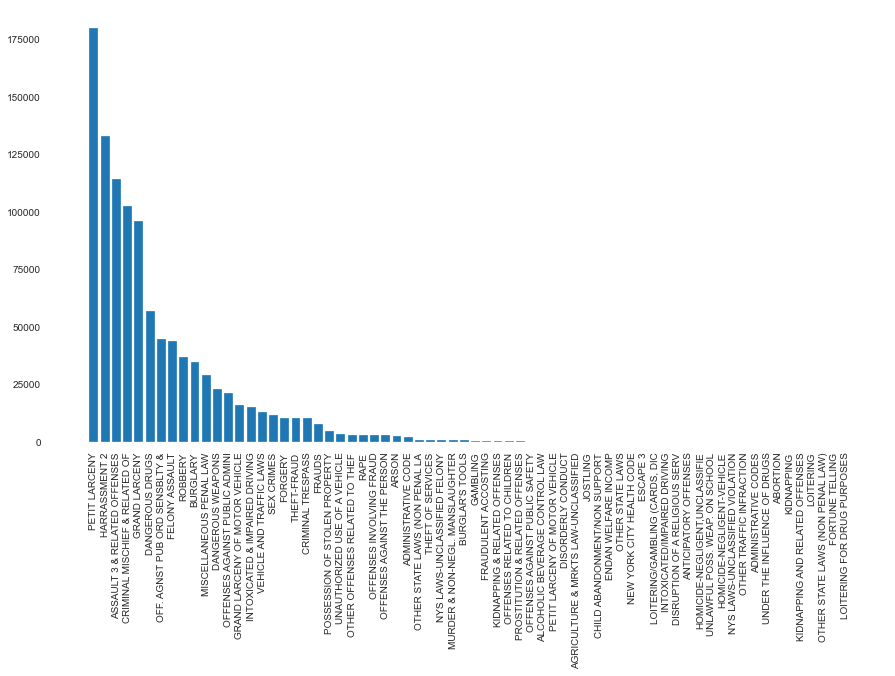

In [80]:
groupedCrime = df_Crime.groupby('OFNS_DESC').count().reset_index()
groupedCrime = groupedCrime.sort_values(by = 'CMPLNT_NUM', ascending = False)
histCrime = groupedCrime[['OFNS_DESC', 'CMPLNT_NUM']]
plt.figure(figsize = (15,8));
plt.bar(histCrime['OFNS_DESC'], histCrime['CMPLNT_NUM']);
plt.xticks(rotation = '90');

Provides a pretty good argument for cutting off the amount of crimes we should be allowing into the analysis

## Days To Report

In [89]:
df_Crime['Days_To_Report'].describe()

count    1.048510e+06
mean     1.631305e-01
std      5.400598e+00
min     -3.000000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      3.000000e+01
Name: Days_To_Report, dtype: float64

In [90]:
df_Crime[df_Crime['Days_To_Report'] < 0].size

1983708